In [ ]:
https://github.com/Hamza9bit/CS351L-Final

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples


# Loads the dataset
# Performs data cleaning and pre-processing

df = pd.read_csv('/Users/student/Desktop/2020296/chatgpt1.csv')

# Splits the dataset into training and testing sets
X = df['Text']  # Feature set
y = df['Language']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Vectorizing the text data
vectorizer = CountVectorizer() 
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Trains and evaluates ML models
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vectorized, y_train)
dt_predictions = dt_model.predict(X_test_vectorized)
dt_accuracy = metrics.accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
rf_predictions = rf_model.predict(X_test_vectorized)
rf_accuracy = metrics.accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_vectorized, y_train)
knn_predictions = knn_model.predict(X_test_vectorized)
knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)
nb_accuracy = metrics.accuracy_score(y_test, nb_predictions)
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)


Decision Tree Accuracy: 0.9114088591140886
Random Forest Accuracy: 0.9203079692030797
KNN Accuracy: 0.7463253674632536
Multinomial Naive Bayes Accuracy: 0.8796120387961204


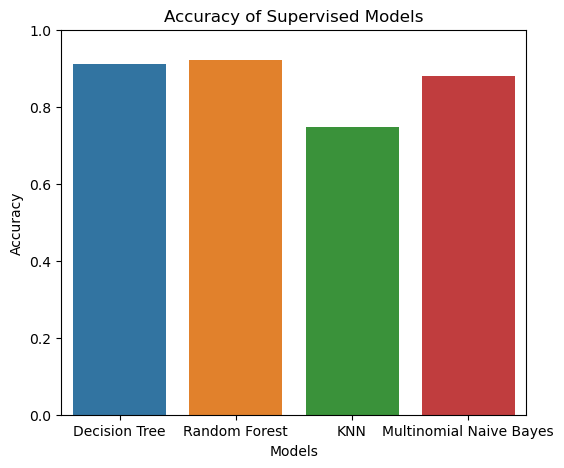

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualizes the performance of supervised machine learning models
models = ['Decision Tree', 'Random Forest', 'KNN', 'Multinomial Naive Bayes']
accuracies = [dt_accuracy, rf_accuracy, knn_accuracy, nb_accuracy]

plt.figure(figsize=(6, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy of Supervised Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()



/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/4j/8jr16sgd1tx5t1bf18_0px5m0000gn/T/ipykernel_1524/592841214.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(i / 3)


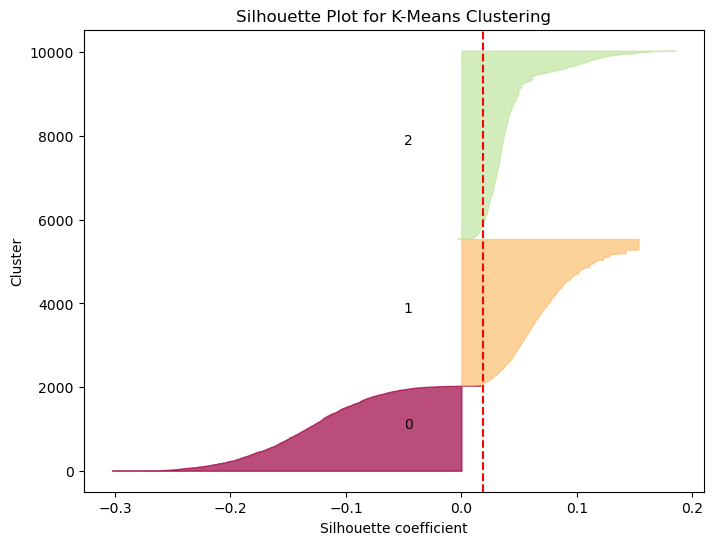

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Apply K-Means clustering
kmeans_model = KMeans(n_clusters=3)  # Choose an appropriate number of clusters
kmeans_model.fit(X_train_vectorized)
kmeans_predictions = kmeans_model.predict(X_test_vectorized)

# Calculate the silhouette score
silhouette_avg = 0.018906967533587473
# Visualize the silhouette plot
silhouette_values = silhouette_samples(X_test_vectorized, kmeans_predictions)

plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = silhouette_values[kmeans_predictions == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(i / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster")
plt.show()

In [5]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/student/Desktop/2020296/chatgpt1.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# importing important libraries
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
import string
import warnings
# for showing all the plots inline
%matplotlib inline
# importing NLP libraries

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from textblob import TextBlob

In [4]:
df= pd.read_csv("/Users/student/Desktop/2020296/chatgpt1.csv")

In [8]:
df.shape

(50001, 20)

In [9]:
df.head(5)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [10]:
df.tail(2)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
49999,2023-01-24 06:58:01+00:00,1617778731678044162,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,0,0,1617778731678044162,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0
50000,2023-01-24 06:58:01+00:00,1617778733355790342,Ahora sueño con el día en que Amazon integre u...,AmericoSD_69,https://twitter.com/AmericoSD_69/status/161777...,https://twitter.com/AmericoSD_69,NaN,NaN,0,0,0,0,1617778733355790342,es,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,[],0


In [11]:
# Info about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            50001 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-null  object
 18  hashta

In [12]:
df.isnull().sum()

Datetime              0
Tweet Id              0
Text                  0
Username              0
Permalink             0
User                  0
Outlinks          30059
CountLinks        30059
ReplyCount            0
RetweetCount          0
LikeCount             0
QuoteCount            0
ConversationId        0
Language              0
Source                0
Media             40499
QuotedTweet       46438
MentionedUsers    32832
hashtag               0
hastag_counts         0
dtype: int64

In [13]:
# All the columns of dataframe
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

In [14]:
# checking for duplicated rows if any
df.duplicated().sum()

0

In [15]:
# statistical description of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tweet Id,50001.0,1.617493e+18,1.725682e+14,1.617156e+18,1.617354e+18,1.617525e+18,1.617625e+18,1.617779e+18
ReplyCount,50001.0,9.291414e-01,2.325171e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.098000e+03
RetweetCount,50001.0,1.498510e+00,4.603006e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.815000e+03
LikeCount,50001.0,9.696326e+00,3.135242e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.607300e+04
QuoteCount,50001.0,2.195356e-01,1.035633e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.947000e+03
ConversationId,50001.0,1.617205e+18,1.005075e+16,6.493609e+17,1.617302e+18,1.617504e+18,1.617607e+18,1.617779e+18
hastag_counts,50001.0,7.833043e-01,1.975040e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.800000e+01


In [16]:
# checking for unique entries in each column
df.nunique()

Datetime          41559
Tweet Id          50001
Text              49555
Username          38433
Permalink         50001
User              38433
Outlinks          13769
CountLinks        19485
ReplyCount          108
RetweetCount        138
LikeCount           366
QuoteCount           51
ConversationId    41430
Language             61
Source              843
Media              9401
QuotedTweet        2040
MentionedUsers    10704
hashtag            7312
hastag_counts        27
dtype: int64

In [17]:
# checking for most frequent values in dataframe columns and outputing result in new dataframe 
def most_occured_values(data):
    total = data.count()
    occur_df = pd.DataFrame(total)
    occur_df.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    occur_df['Most Occured value'] = items
    occur_df['Frequency'] = vals
    occur_df['Percentage'] = np.round(vals / total * 100, 3)
    #return(np.transpose(occur_df))
    return(occur_df)

In [18]:
most_occured_values(df)

,Total,Most Occured value,Frequency,Percentage
Datetime,50001,2023-01-23 17:11:13+00:00,8,0.016
Tweet Id,50001,1617156270871699456,1,0.002
Text,50001,@chatgpt_issac AI,164,0.328
Username,50001,translation_ja,60,0.120
Permalink,50001,https://twitter.com/mochico0123/status/1617156...,1,0.002
User,50001,https://twitter.com/translation_ja,60,0.120
Outlinks,19942,['https://www.ft.com/content/7229ba86-142a-49f...,149,0.747
CountLinks,19942,['https://t.co/xegxY3jDom'],19,0.095
ReplyCount,50001,0,36736,73.471
RetweetCount,50001,0,42416,84.830


In [19]:
df["User"].unique()

array(['https://twitter.com/mochico0123',
       'https://twitter.com/Caput_LupinumSG', 'https://twitter.com/ciffi',
       ..., 'https://twitter.com/marcopiccinini',
       'https://twitter.com/EuniceNyandat',
       'https://twitter.com/AmericoSD_69'], dtype=object)

In [20]:
df["User"].value_counts()

https://twitter.com/translation_ja    60
https://twitter.com/SaveToNotion      47
https://twitter.com/trandanhmmo       44
https://twitter.com/richardkimphd     43
https://twitter.com/VeilleCyber3      38
                                      ..
https://twitter.com/masayume_32        1
https://twitter.com/WRoughSketch       1
https://twitter.com/ayazfarooqui       1
https://twitter.com/Technology_GD      1
https://twitter.com/AmericoSD_69       1
Name: User, Length: 38433, dtype: int64

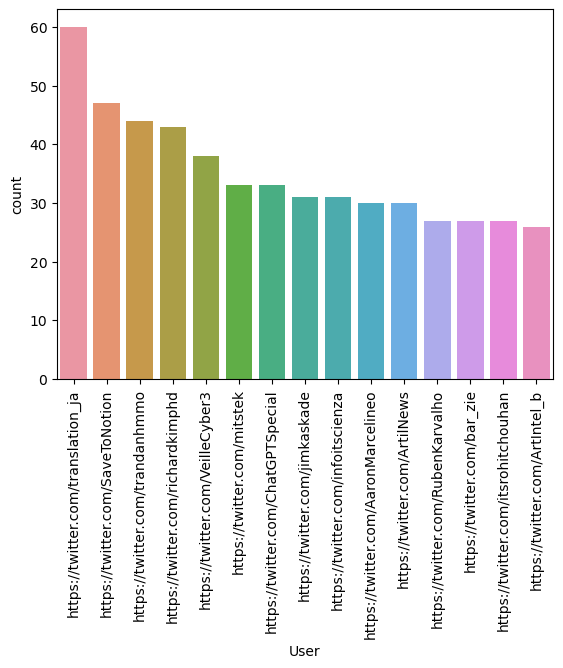

In [21]:
sns.countplot(data=df, x='User', order=df["User"].value_counts().index[:15])
plt.xticks(rotation=90)
plt.show()

In [22]:
df["ReplyCount"].value_counts()

0      36736
1       9430
2       1801
3        653
4        333
       ...  
45         1
147        1
106        1
166        1
331        1
Name: ReplyCount, Length: 108, dtype: int64

In [23]:
df["ReplyCount"].unique()

array([   1,    0,   23,    4,   37,    2,    3,  209,  149,  126,   17,
         22,    5,   54,   34,   21,   13, 3098,   69, 1421,   10,    8,
          6,    9,    7,   43,   15,   11,   12,  111,   29,  164,  286,
         28,   20,  496,   14,   31,   40,   47,  374,   33,  338,   26,
        100,   39,   18,   59,  154,   16,   55,  114,  476,   44,   24,
        119,   99,   42,   36,   27,   68,   92,  159,   19,   88,   35,
        446,   52,   45,  147,  106,  166,   32,   89,  165,   50,  130,
         51,   95, 1455, 3044,   96,  490,  194,   48,   74,  248,   72,
         80,   57,   25,   93,   38, 1110,  161,  183,   41,  135,   79,
        103,   71,   49,   30,   63,  176,   67,  777,  331])

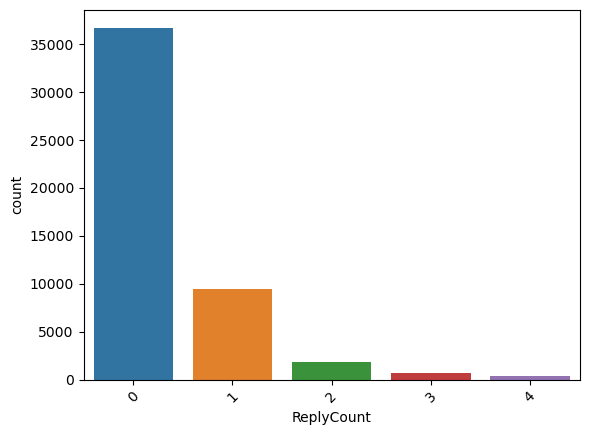

In [24]:
sns.countplot(data=df, x='ReplyCount', order=df["ReplyCount"].value_counts().index[:5])
plt.xticks(rotation=45)
plt.show()

In [25]:
df["RetweetCount"].value_counts()

0      42416
1       3925
2       1204
3        620
4        365
       ...  
221        1
222        1
337        1
236        1
248        1
Name: RetweetCount, Length: 138, dtype: int64

In [26]:
df["RetweetCount"].unique()

array([   0,    1,    5,    6,  542,   40,   49,   18,    3,    2,   16,
          4,  112,   39,   36, 1094,   12, 6815,   10,   20,    7,   58,
         23,   11,   15,   45,   37,    8,   31,   19,  160,   27,    9,
         38,   34,   14,  125,   17,   74,  461,   68,   26,   13, 2627,
         47,   53,   88,   21,   25,  221,  334,   50,   30,   22,  252,
         33,  713,  597,   76,   43,   28,  227, 1732,   66,   98,  136,
         92,  114,  730,   64,   24,  202, 1874,   67,   29,  186,  118,
         97,   52,  108, 2463,   59,   32,   93,   35,   56,  564, 3987,
        170,   55,  257, 1307,   95,   62,   44,   57,   89,   54,   83,
        222,  337,  236,  376,  121, 1533,  458,   78,   61,   51, 2203,
         70,  428,   42,  140,   46, 1534,  164,  162,  213,  139,  289,
       1113,   48,  418,  206,  107,  148,   99,  516,   41,  452,  630,
        176,   79,   69,  679, 2082,  248])

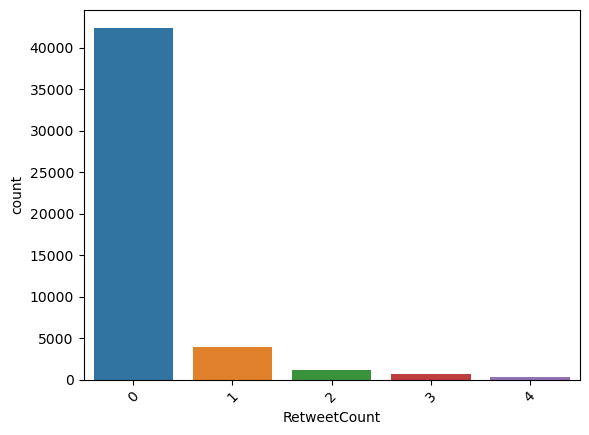

In [27]:
sns.countplot(data=df, x='RetweetCount', order=df["RetweetCount"].value_counts().index[:5])
plt.xticks(rotation=45)
plt.show()

In [28]:
df["LikeCount"].value_counts()

0      27141
1       9490
2       3873
3       2086
4       1241
       ...  
242        1
202        1
347        1
404        1
424        1
Name: LikeCount, Length: 366, dtype: int64

In [29]:
df["LikeCount"].unique()

array([    5,     4,     2,     1,     0,     3,    66,    20,  9125,
           7,   348,   607,    11,     9,   404,     8,     6,    68,
         329,    10,    17,    15,  1905,   211,    16,    22,    14,
         381,    13,  5682,    42,   190,    57, 56073,    26,    38,
          30,    97,    24,    19,    12,    50,    18,    29,    51,
          33,    41,    55,    44,   663,    75,    54,    39,    21,
          37,   252,    40,    47,   390,    87,   177,    23,    84,
          28,    31,   131,   251,    86,  1055,   171,    65,   144,
          58,   111,    71,    74,   127,    36,    32,   234,   654,
         222,   711,  3952,    43,    46,   273,   168,   349,   239,
         118,   112,    64,    27,   228,    25,    56,   186,    93,
       12557,   733,    98,    61,    35,   100,   147,   322,    49,
         383,   189,    67,    45,    34,   135,   132,   113,    76,
         759,   165,   164,    48,    72,   220,   107,  1608,  2250,
         302,    73,

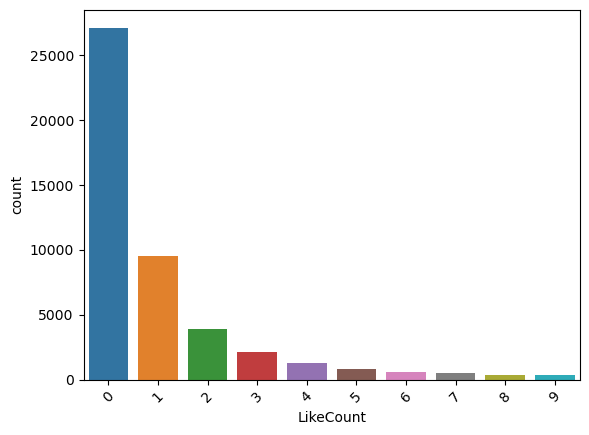

In [30]:
sns.countplot(data=df, x='LikeCount', order=df["LikeCount"].value_counts().index[:10])
plt.xticks(rotation=45)
plt.show()

In [31]:
df["QuoteCount"].unique()

array([   0,    1,    2,   15,    6,    8,    3,   14,   45, 1947,    9,
          4,    5,   23,  110,  726,   11,   27,    7,   87,   10,  126,
         16,   22,  205,  298,   13,   80,   38,   81,   29,   24,   12,
        495,  216,   25,   37,   57,   48,   19,  413,   18,  374,   20,
         60,   46,   21,   42,   17,   55,  456])

In [32]:
df["QuoteCount"].value_counts()

0       47665
1        1575
2         337
3         147
4          70
5          34
7          28
6          23
9          16
8          13
10         13
11         10
12          8
27          6
14          5
25          4
15          4
24          3
16          3
37          2
19          2
60          2
29          2
38          2
57          1
48          1
21          1
413         1
46          1
374         1
20          1
55          1
17          1
42          1
18          1
298         1
216         1
495         1
81          1
80          1
13          1
205         1
22          1
126         1
87          1
726         1
110         1
23          1
1947        1
45          1
456         1
Name: QuoteCount, dtype: int64

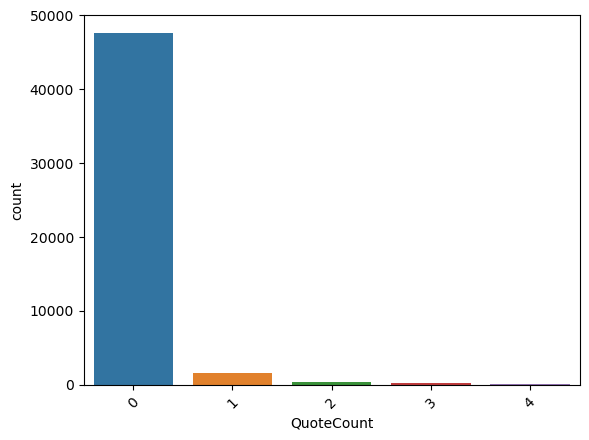

In [33]:
sns.countplot(data=df, x='QuoteCount', order=df["QuoteCount"].value_counts().index[:5])
plt.xticks(rotation=45)
plt.show()

In [34]:
df["Language"].unique()

array(['ja', 'en', 'de', 'tr', 'pl', 'fr', 'es', 'pt', 'lo', 'no', 'ca',
       'zh', 'qme', 'th', 'ne', 'ko', 'und', 'nl', 'fa', 'it', 'da', 'fi',
       'eu', 'hi', 'ar', 'sv', 'in', 'ru', 'qht', 'tl', 'hu', 'cs', 'uk',
       'iw', 'et', 'cy', 'bg', 'ht', 'el', 'vi', 'sl', 'kn', 'ro', 'lt',
       'ur', 'zxx', 'ml', 'mr', 'lv', 'gu', 'qam', 'is', 'ta', 'te', 'pa',
       'sd', 'am', 'sr', 'hy', 'or', 'bn'], dtype=object)

In [35]:
df["Language"].value_counts()

en    32076
ja     5046
es     3315
fr     2492
de     1207
      ...  
sd        1
am        1
hy        1
or        1
bn        1
Name: Language, Length: 61, dtype: int64

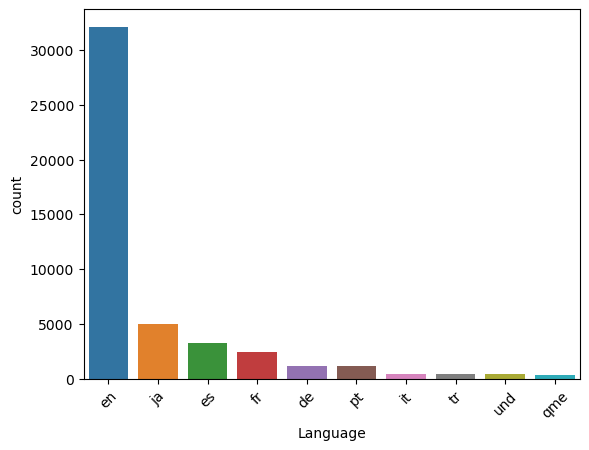

In [36]:
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:10])
plt.xticks(rotation=45)
plt.show()

In [37]:
# NOW WE ARE GOING TO DO HASHTAG ANALYSIS
df["hashtag"].unique()

array(['[]', "['#ChatGPT']", "['#ChatGPT', '#midjourney']", ...,
       "['#GautamAdani', '#ChatGPT.', '#']", "['#LastWeekTonight']",
       "['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dialog', '#simuliert.']"],
      dtype=object)

In [38]:
df["hashtag"].value_counts()

[]                                                                                                                                                                                                                                                           36414
['#ChatGPT']                                                                                                                                                                                                                                                  2899
['#chatgpt']                                                                                                                                                                                                                                                   314
['#chatGPT']                                                                                                                                                                                                                   

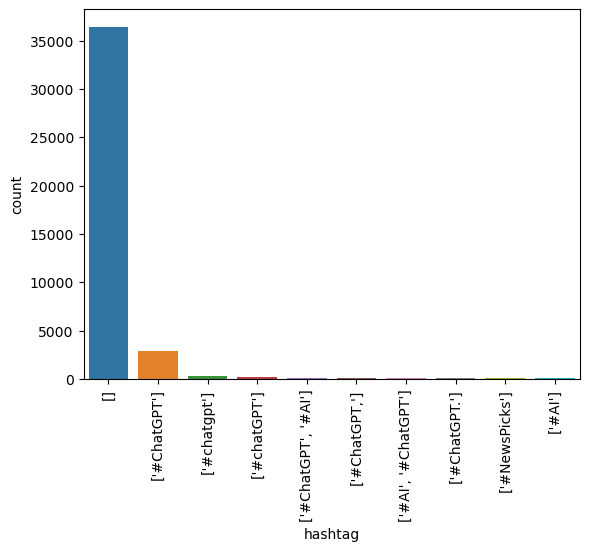

In [39]:
sns.countplot(data=df, x='hashtag', order=df["hashtag"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

In [40]:
df["hastag_counts"].unique()

array([ 0,  1,  2,  4, 11,  5,  3, 10, 15,  8, 12,  9,  6,  7, 13, 14, 16,
       23, 20, 18, 21, 24, 22, 25, 17, 28, 19])

In [41]:
df["hastag_counts"].value_counts()

0     36414
1      5516
2      2772
3      1944
4      1150
5       651
6       396
7       295
8       229
9       124
10       98
13       76
11       69
12       51
15       44
16       43
14       41
18       25
17       14
23        9
19        9
25        8
21        7
20        7
24        6
22        2
28        1
Name: hastag_counts, dtype: int64

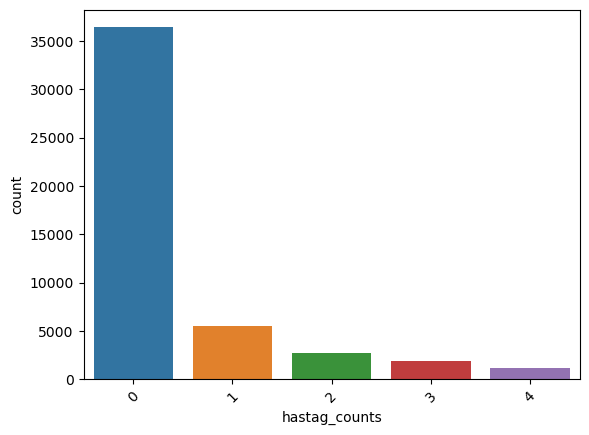

In [42]:
sns.countplot(data=df, x='hastag_counts', order=df["hastag_counts"].value_counts().index[:5])
plt.xticks(rotation=45)
plt.show()

In [43]:
# Now we are doing text Preprocessing

In [44]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text

In [45]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
df['tidy_text'] = np.vectorize(remove_pattern)(df['Text'], "@[\w]*: | *RT*")
df[["Text", "tidy_text"]].head(5)

,Text,tidy_text
0,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...
1,@AlexandrovnaIng Prohibition of ChatGPT has be...,@AlexandrovnaIng Prohibition of ChatGPT has be...
2,"Schaut Euch an, was @fobizz @DianaKnodel alles...","Schaut Euch an, was @fobizz @DianaKnodel alles..."
3,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...
4,"Profilinde vatan, Türkiye falan yazan bireyler...","Profilinde vatan, Türkiye falan yazan bireyler..."


In [46]:
df_tweets= df[["tidy_text"]]
df_tweets.head()

,tidy_text
0,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...
1,@AlexandrovnaIng Prohibition of ChatGPT has be...
2,"Schaut Euch an, was @fobizz @DianaKnodel alles..."
3,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...
4,"Profilinde vatan, Türkiye falan yazan bireyler..."


In [47]:
# Removing http/https

cleaned_tweets = []

for index, row in df.iterrows():
    
    # Here we are filtering out all the words that contains link
    
    words_without_links = [word for word in row.tidy_text.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

df['tidy_text'] = cleaned_tweets
df[["Text", "tidy_text"]].head(10)

,Text,tidy_text
0,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,ChatGPTで遊ぶの忘れてた！！ 書類作るコード書いてみてほしいのと、 どこまで思考整理付...
1,@AlexandrovnaIng Prohibition of ChatGPT has be...,@AlexandrovnaIng Prohibition of ChatGPT has be...
2,"Schaut Euch an, was @fobizz @DianaKnodel alles...","Schaut Euch an, was @fobizz @DianaKnodel alles..."
3,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Bow down to chatGPT 🫡.....
4,"Profilinde vatan, Türkiye falan yazan bireyler...","Profilinde vatan, Türkiye falan yazan bireyler..."
5,ChatGPT’nin bilinmeyen arka planı: Ucuz iş güc...,ChatGPT’nin bilinmeyen arka planı: Ucuz iş güc...
6,ChatGPT runs 10K Nvidia training GPUs with pot...,ChatGPT runs 10K Nvidia training GPUs with pot...
7,@SWENGDAD There is repetitive work in every jo...,@SWENGDAD There is repetitive work in every jo...
8,I created a fictional jewelry brand using Chat...,I created a fictional jewelry brand using Chat...
9,It will look similar to irobot. The company wi...,It will look similar to irobot. The company wi...


In [48]:
# removing empty text
df = df[df['tidy_text']!='']
df[["Text", "tidy_text"]].head(5)

,Text,tidy_text
0,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,ChatGPTで遊ぶの忘れてた！！ 書類作るコード書いてみてほしいのと、 どこまで思考整理付...
1,@AlexandrovnaIng Prohibition of ChatGPT has be...,@AlexandrovnaIng Prohibition of ChatGPT has be...
2,"Schaut Euch an, was @fobizz @DianaKnodel alles...","Schaut Euch an, was @fobizz @DianaKnodel alles..."
3,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Bow down to chatGPT 🫡.....
4,"Profilinde vatan, Türkiye falan yazan bireyler...","Profilinde vatan, Türkiye falan yazan bireyler..."


In [49]:
#v Resetting Index 
df = df.reset_index(drop=True)
df.shape

(49969, 21)

In [50]:
# Removing punctuations, numbers and special characters

df['All_tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z# ]", "")

/var/folders/4j/8jr16sgd1tx5t1bf18_0px5m0000gn/T/ipykernel_1412/2129550658.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['All_tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z# ]", "")


In [51]:
# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package 

In [52]:
# Removing stopwords

stopwords_set = set(stopwords)
cleaned_text = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.All_tidy_text.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) 
    cleaned_text.append(' '.join(words_without_stopwords))
    
df['All_tidy_text'] = cleaned_text
df[["Text","tidy_text" ,"All_tidy_text"]].head(10)

,Text,tidy_text,All_tidy_text
0,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,ChatGPTで遊ぶの忘れてた！！ 書類作るコード書いてみてほしいのと、 どこまで思考整理付...,ChatGPT
1,@AlexandrovnaIng Prohibition of ChatGPT has be...,@AlexandrovnaIng Prohibition of ChatGPT has be...,AlexandrovnaIng Prohibition ChatGPT added hono...
2,"Schaut Euch an, was @fobizz @DianaKnodel alles...","Schaut Euch an, was @fobizz @DianaKnodel alles...",Schaut Euch fobizz DianaKnodel alles auf die P...
3,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Bow down to chatGPT 🫡.....,Bow chatGPT
4,"Profilinde vatan, Türkiye falan yazan bireyler...","Profilinde vatan, Türkiye falan yazan bireyler...",Profilinde vatan Trkiye falan yazan bireylerin...
5,ChatGPT’nin bilinmeyen arka planı: Ucuz iş güc...,ChatGPT’nin bilinmeyen arka planı: Ucuz iş güc...,ChatGPTnin bilinmeyen arka plan Ucuz gc eviri ...
6,ChatGPT runs 10K Nvidia training GPUs with pot...,ChatGPT runs 10K Nvidia training GPUs with pot...,ChatGPT runs K Nvidia training GPUs potential ...
7,@SWENGDAD There is repetitive work in every jo...,@SWENGDAD There is repetitive work in every jo...,SWENGDAD There repetitive work every job lots ...
8,I created a fictional jewelry brand using Chat...,I created a fictional jewelry brand using Chat...,I created fictional jewelry brand using ChatGP...
9,It will look similar to irobot. The company wi...,It will look similar to irobot. The company wi...,It look similar irobot The company install min...


In [53]:
stopwords = set(stopwords)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    wordcloud =WordCloud(stopwords=stopwords, scale=4,random_state=20, max_font_size=50, max_words=500,mask=mask, relative_scaling=0.5, background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20, color='white')
    fig.subplots_adjust(top=2)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

In [54]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['dayofyear'] = df['Datetime'].dt.dayofyear
df['date'] = df['Datetime'].dt.date

In [55]:
text_time_df = df.groupby(["date"])["All_tidy_text"].count().reset_index()
text_time_df.columns = ["date", "count"]

In [56]:
def plot_time_Interval(df, x='date', y='count', hue=None, size=1, title="", is_log=False):
    sns.set(style="whitegrid")                                                 
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 20}                  
    sns.set_context("paper", rc = paper_rc)  
    f, ax = plt.subplots(1,1, figsize=(10,5))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

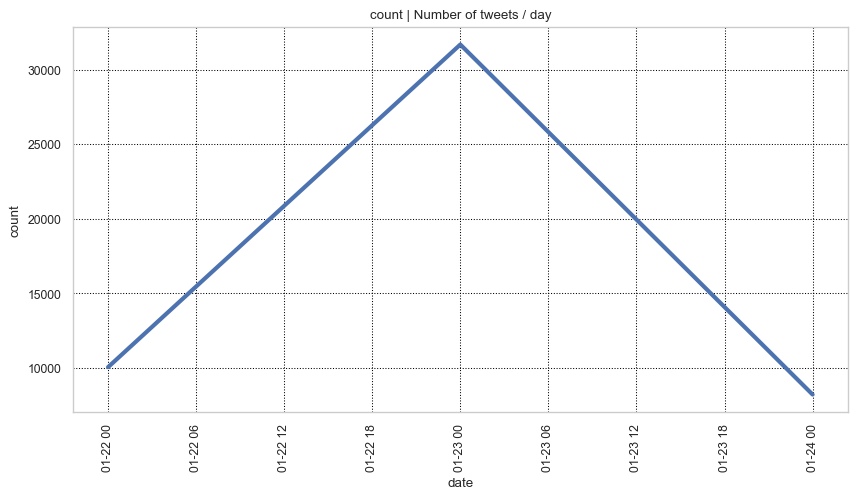

In [57]:
plot_time_Interval(text_time_df, x='date', title="Number of tweets / day")


In [58]:
df['dayofweek'].unique()

array([6, 0, 1])

In [59]:
s=df['dayofweek'].value_counts()

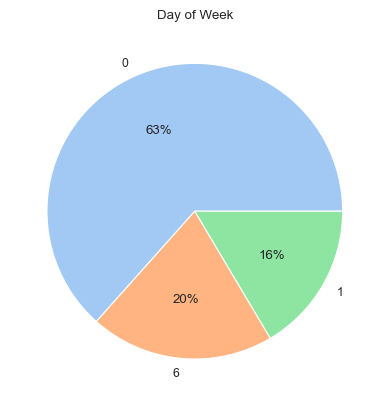

In [60]:
palette_color = sns.color_palette('pastel')
plt.title("Day of Week")
plt.pie(s, labels=s.index, colors=palette_color, autopct='%.0f%%')
plt.show()

In [61]:
df['date'].unique()

array([datetime.date(2023, 1, 22), datetime.date(2023, 1, 23),
       datetime.date(2023, 1, 24)], dtype=object)

In [62]:
s1=df['date'].value_counts()

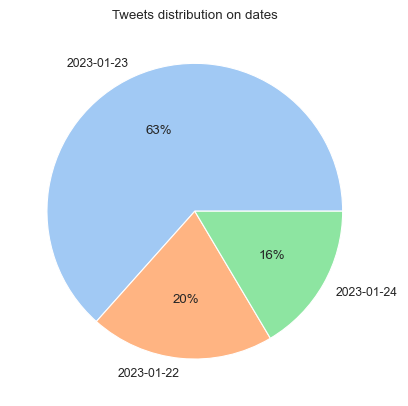

In [63]:
plt.title("Tweets distribution on dates")
palette_color = sns.color_palette('pastel')
plt.pie(s1, labels=s1.index, colors=palette_color, autopct='%.0f%%')
plt.show()

In [64]:
SIA = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if SIA.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif SIA.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [65]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    
    colors = ["Black", "Green", "Red"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=10)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=10)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

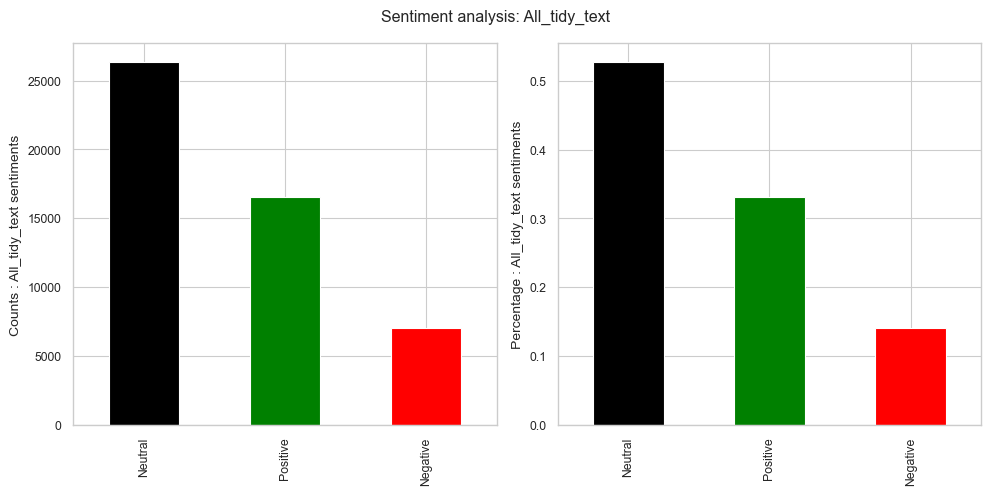

In [66]:
df['text_sentiment'] = df['All_tidy_text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'All_tidy_text')

In [67]:
text_time_df1 = df.groupby(["date", "text_sentiment"])["Text"].count().reset_index()
text_time_df1.columns = ["date", "text_sentiment", "count"]

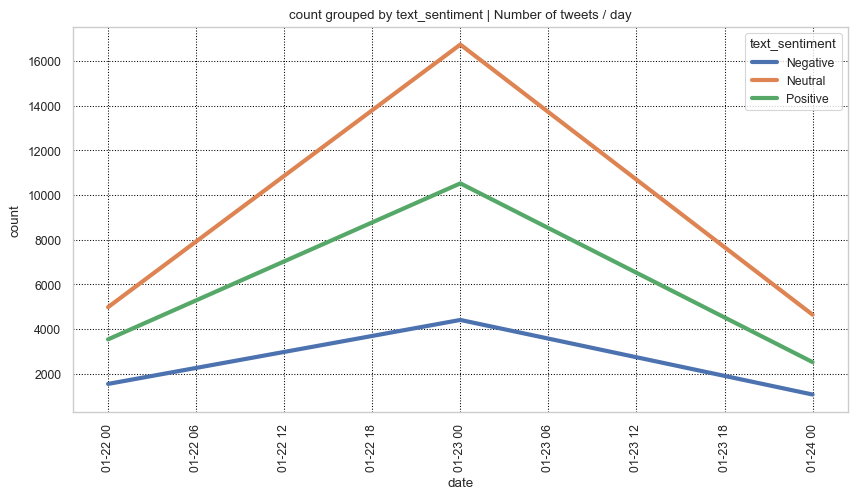

In [68]:
plot_time_Interval(text_time_df1, x='date', title="Number of tweets / day", hue="text_sentiment")

In [69]:
# Now we are doing clustring

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/student/Desktop/2020071/chatgpt1.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.